# 범죄 발생 장소 통계 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False #한글 폰트

df = pd.read_csv('경찰청_범죄 발생 장소별 통계.csv', encoding='cp949')#데이터불러오기

In [2]:
df.head()

,범죄대분류,범죄중분류,아파트_연립다세대,단독주택,고속도로,노상,백화점,슈퍼마켓,편의점,대형할인매장,...,종교기관,산야,해상,부대,구금장소,공지,주차장,공중화장실,피씨방,기타
0,강력범죄,살인기수,92,57,1,43,0,0,0,0,...,0,2,1,0,0,0,2,0,1,19
1,강력범죄,살인미수등,116,67,1,87,0,3,3,0,...,1,2,0,0,0,0,7,1,0,28
2,강력범죄,강도,78,47,1,114,2,10,39,3,...,1,4,0,0,0,0,10,3,1,36
3,강력범죄,강간,1561,976,2,127,0,0,1,0,...,8,8,0,1,0,1,20,43,4,377
4,강력범죄,유사강간,247,147,0,36,0,0,2,0,...,2,1,0,0,1,0,11,9,1,60


In [3]:
df.tail()

,범죄대분류,범죄중분류,아파트_연립다세대,단독주택,고속도로,노상,백화점,슈퍼마켓,편의점,대형할인매장,...,종교기관,산야,해상,부대,구금장소,공지,주차장,공중화장실,피씨방,기타
33,노동범죄,노동범죄,3,5,0,21,0,0,1,0,...,0,3,4,0,0,0,0,0,0,141
34,안보범죄,안보범죄,2,6,0,32,0,0,1,0,...,0,0,1,0,0,0,0,0,1,99
35,선거범죄,선거범죄,6,6,0,101,0,0,0,0,...,3,0,0,0,0,0,0,0,0,90
36,병역범죄,병역범죄,128,244,1,76,0,0,0,0,...,0,1,0,76,0,0,0,0,0,1013
37,기타범죄,기타범죄,23270,16456,1225,44243,77,588,1871,67,...,510,2782,15713,125,33,72,1791,172,943,82049


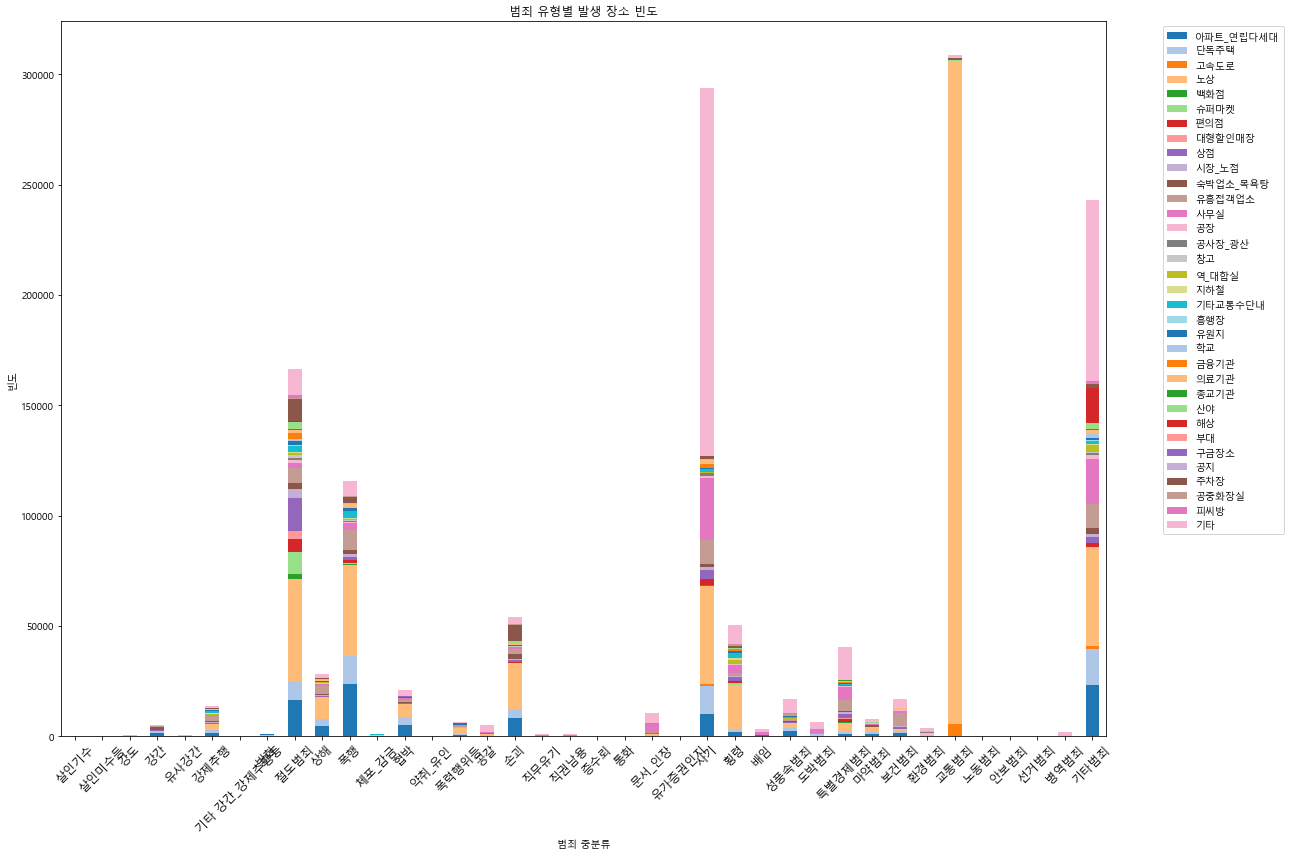

In [4]:
data = pd.DataFrame(df)

data.plot(kind='bar', x='범죄중분류', figsize=(18, 12), stacked=True, color=plt.cm.tab20.colors)
plt.title('범죄 유형별 발생 장소 빈도')
plt.xlabel('범죄 중분류')
plt.ylabel('빈도')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 45, fontsize= 12)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

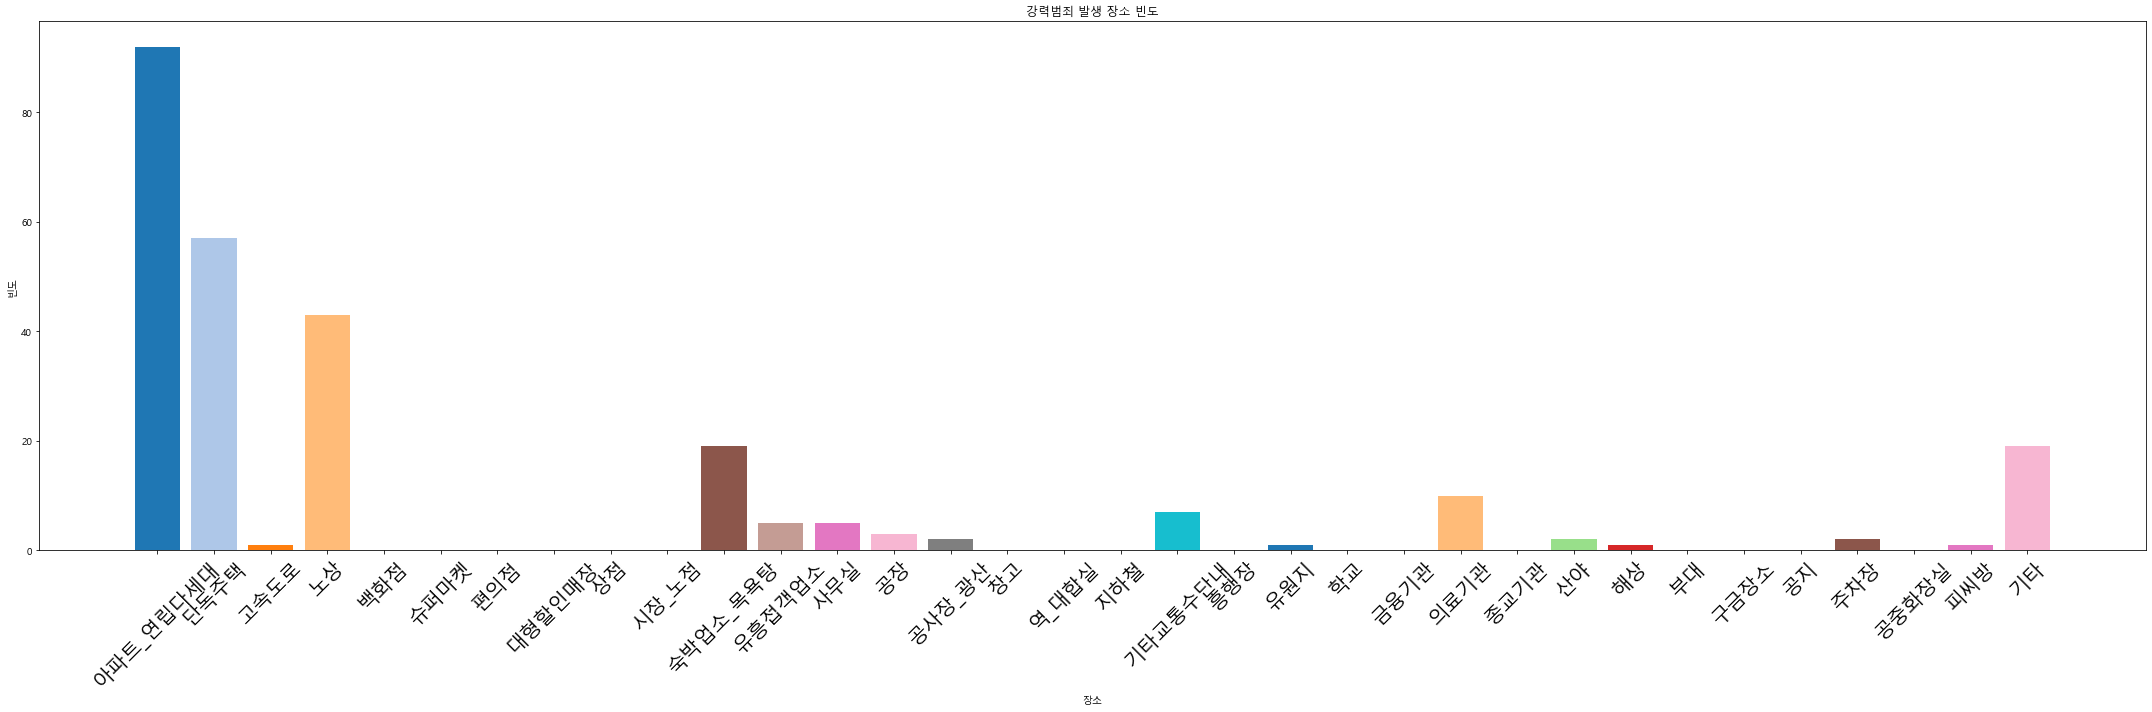

In [5]:
act_crime = df[df["범죄대분류"] == "강력범죄"]

act_crime_data = act_crime.drop(columns=["범죄대분류", "범죄중분류"])

plt.figure(figsize=(30,10))
plt.bar(act_crime_data.columns, act_crime_data.iloc[0], color=plt.cm.tab20.colors)
plt.title("강력범죄 발생 장소 빈도")
plt.xlabel('장소')
plt.ylabel('빈도')
plt.xticks(rotation = 45, fontsize= 20)
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

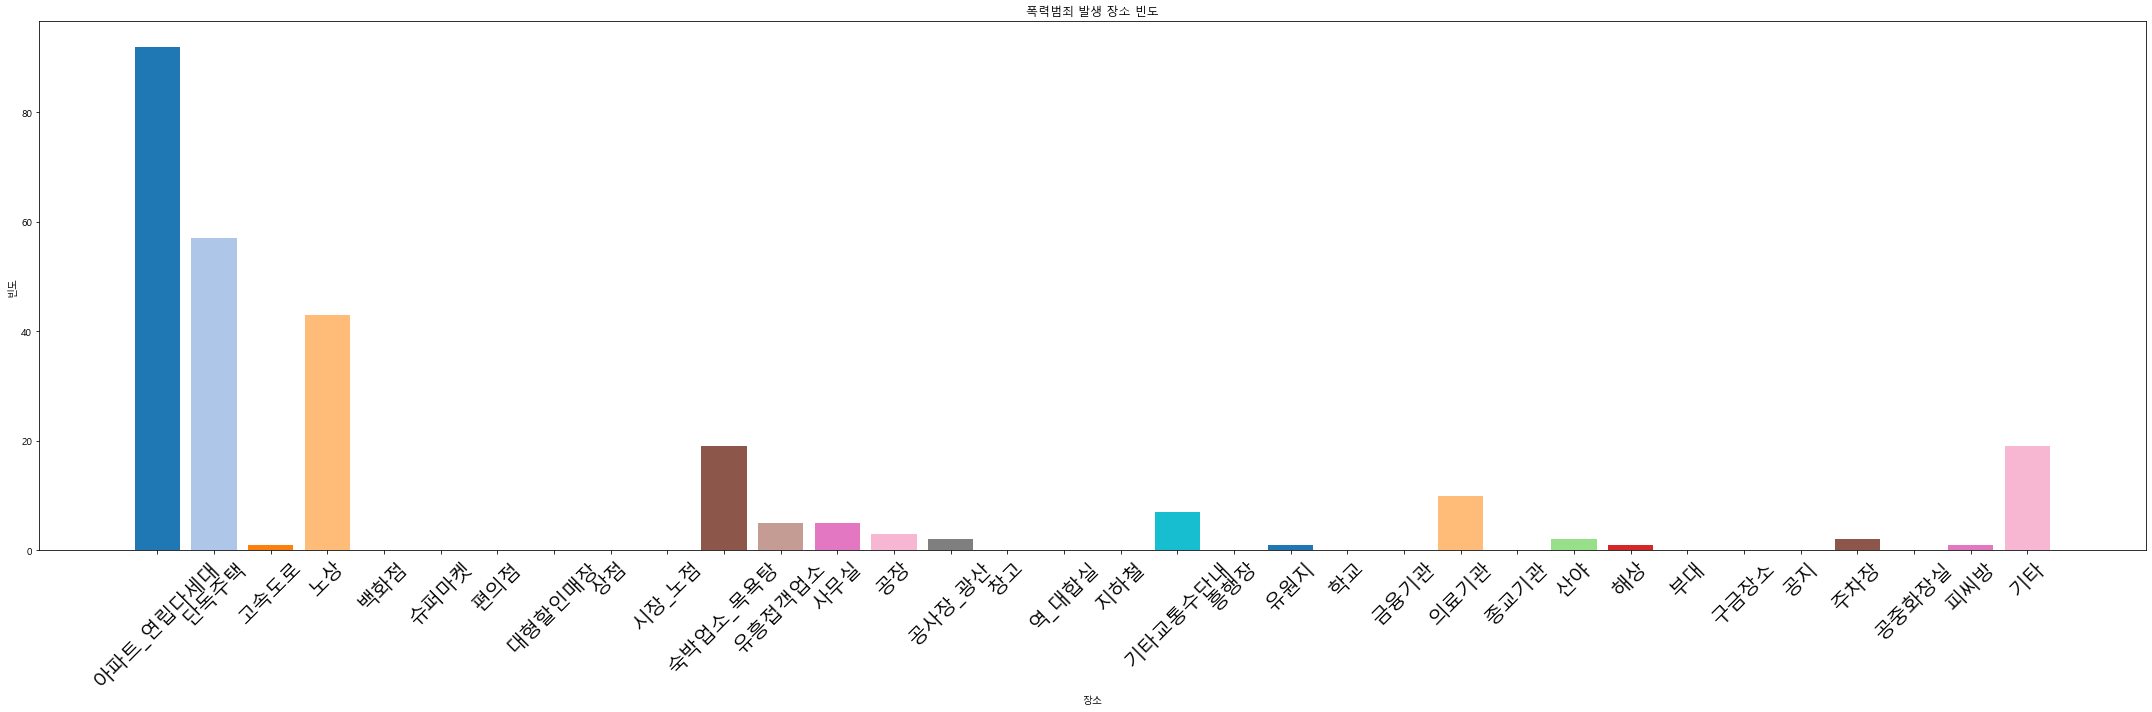

In [6]:
act_crime = df[df["범죄대분류"] == "폭력범죄"]

plt.figure(figsize=(30,10))
plt.bar(act_crime_data.columns, act_crime_data.iloc[0], color=plt.cm.tab20.colors)
plt.title("폭력범죄 발생 장소 빈도")
plt.xlabel('장소')
plt.ylabel('빈도')
plt.xticks(rotation = 45, fontsize= 20)
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

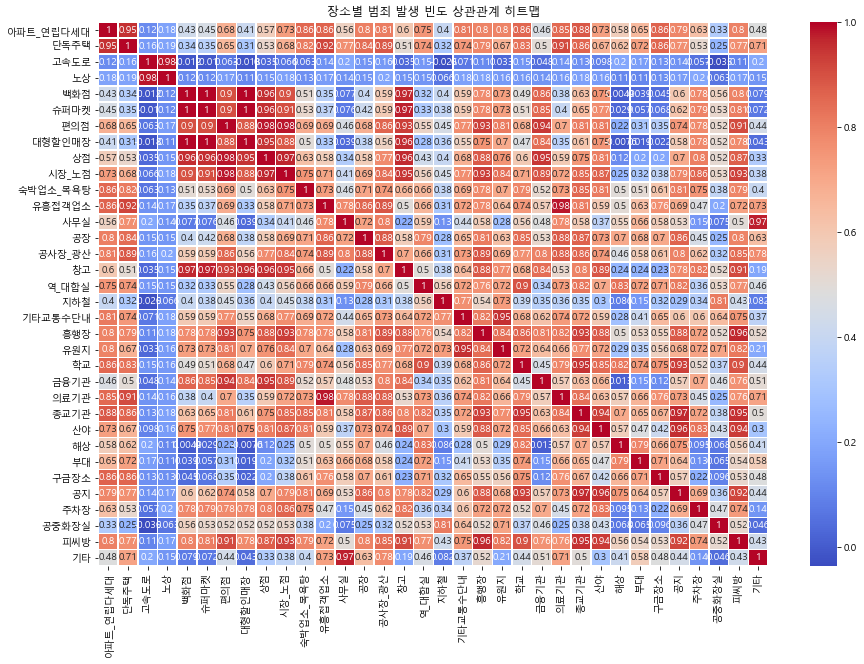

In [7]:
import seaborn as sns

data.set_index("범죄대분류", inplace=True)

correlation_matrix = data.corr()
#히트맵 작성
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('장소별 범죄 발생 빈도 상관관계 히트맵')
plt.show

In [13]:
sorted_correlations = correlation_matrix.abs().unstack().sort_values(ascending=False)

sorted_correlations = sorted_correlations[sorted_correlations != 1].drop_duplicates()

print(sorted_correlations.head(10))
print(sorted_correlations.tail(10))

대형할인매장  슈퍼마켓      0.998550
백화점     슈퍼마켓      0.998362
        대형할인매장    0.997933
편의점     상점        0.980724
의료기관    유흥접객업소    0.980701
시장_노점   편의점       0.980623
고속도로    노상        0.980036
사무실     기타        0.973772
슈퍼마켓    창고        0.972737
시장_노점   상점        0.971306
dtype: float64
해상      슈퍼마켓      0.029082
고속도로    지하철       0.024554
대형할인매장  구금장소      0.021910
부대      대형할인매장    0.019000
대형할인매장  고속도로      0.018180
금융기관    해상        0.013146
고속도로    백화점       0.012265
슈퍼마켓    고속도로      0.010277
대형할인매장  해상        0.007627
백화점     해상        0.004939
dtype: float64


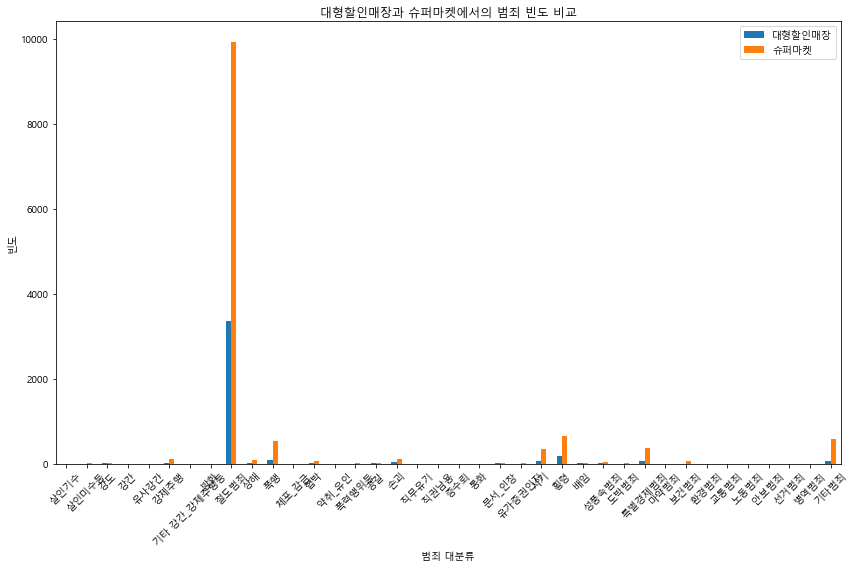

In [9]:
df.set_index("범죄중분류", inplace = True)

#제일 높은 상관관계가 있는 대형할인매장과 슈퍼마켓 빈도 비교
compare_df = df[['대형할인매장', '슈퍼마켓']]

compare_df.plot(kind='bar', figsize=(12, 8))
plt.title('대형할인매장과 슈퍼마켓에서의 범죄 빈도 비교')
plt.xlabel('범죄 대분류')
plt.ylabel('빈도')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

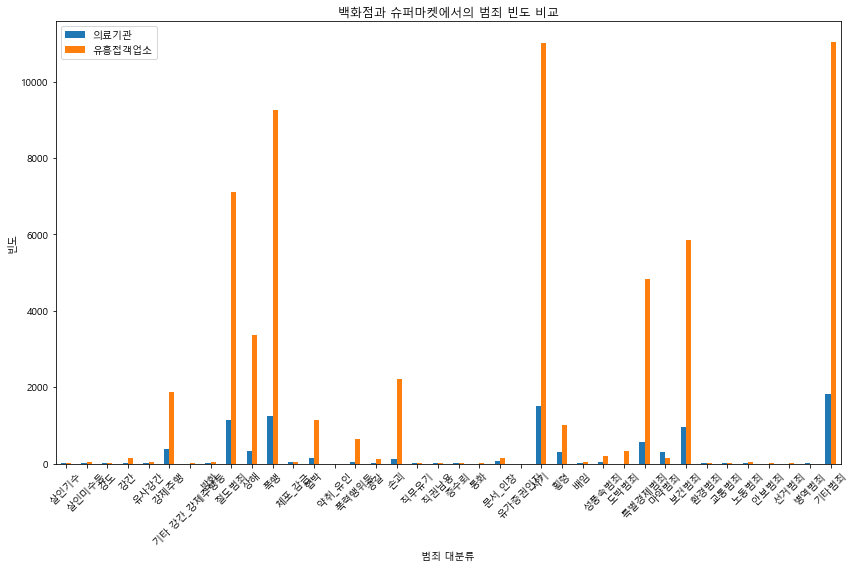

In [12]:
#의외라고 생각한 것 중 하나인 의료기관과 유흥접객업소 빈도 비교
compare_df = df[['의료기관', '유흥접객업소']]

compare_df.plot(kind='bar', figsize=(12, 8))
plt.title('백화점과 슈퍼마켓에서의 범죄 빈도 비교')
plt.xlabel('범죄 대분류')
plt.ylabel('빈도')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

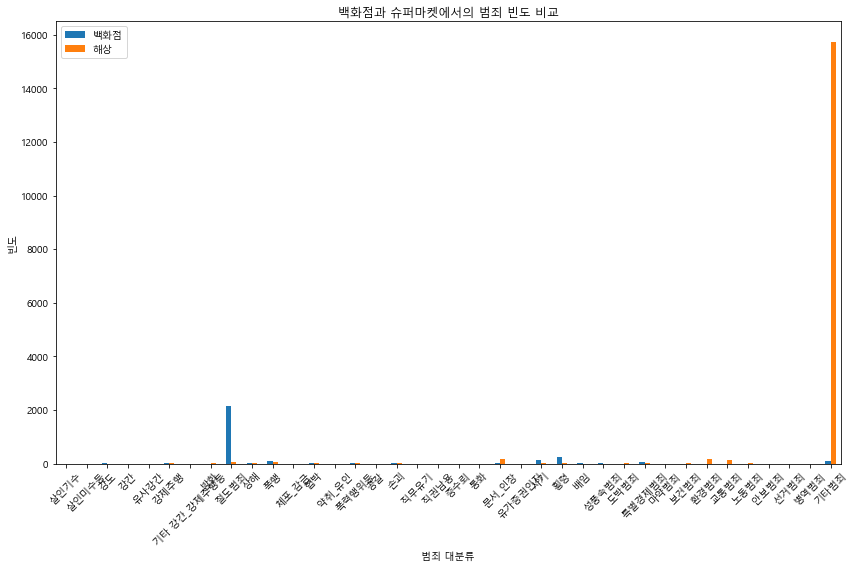

In [14]:
#제일 낮은 상관관계 인 백화점과 해상 빈도 비교
compare_df = df[['백화점', '해상']]

compare_df.plot(kind='bar', figsize=(12, 8))
plt.title('백화점과 슈퍼마켓에서의 범죄 빈도 비교')
plt.xlabel('범죄 대분류')
plt.ylabel('빈도')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()